In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

## Keras sequenziale o funzionale
### sequenziale per architetture semplici ma non per complicate
### funzionale: functional API topologie più complicate https://keras.io/guides/functional_api/

# Load dataset and build noisy images

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Appiattiamo i dati [#numero di esempi, dimensione img, dimensione immagine]
# utilizza questo vettore decostruisci la tupla usando l'operatore (*)
numpixels = np.multiply(*x_train.shape[1:])
imshape = x_train.shape[1:]

We will not be using convolution layers. We need to flatten the input...

In [20]:
noisy_x_train = x_train.reshape(-1, numpixels)
noisy_x_test = x_test.reshape(-1, numpixels)

Add random uniform noise to the image

In [21]:
noisy_x_train.shape

(60000, 784)

In [22]:
# Vogliamo solo alcune immagini "corrote" dal rumore, non da tutte 70% 30%
threshold = 0.7
# Train set
perturbed_pixels = np.random.uniform(size=noisy_x_train.shape) > threshold
noisy_x_train = noisy_x_train + np.random.uniform(size=noisy_x_train.shape)*255*perturbed_pixels
noisy_x_train = noisy_x_train.clip(255)

# Test set
perturbed_pixels_test = np.random.uniform(size=noisy_x_test.shape) > threshold
noisy_x_test = noisy_x_test + np.random.uniform(size=noisy_x_test.shape)*255*perturbed_pixels_test
noisy_x_test = noisy_x_test.clip(0,255)

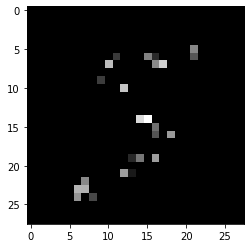

In [23]:
es = noisy_x_train[0]
plt.imshow(es.reshape(28,28))

# Building and fitting the model

Create a keras shallow autoencoder. You are free to experiment with the architecture. Here are some choices that work well enough.

- **input layer**: ...
- **h**: dense layer, hsize neurons,  activation:linear
- **output**: dense layer -- ...

In [24]:
hsize = 30

inputs = keras.Input(shape=[numpixels,])
h = Dense(hsize, activation="linear", name="h")(inputs)
output = Dense(numpixels, activation="linear", name="output")(h)

model = keras.Model(inputs, output)

In [25]:
model.compile(loss="mean_squared_error")
model.summary()

Model: "functional_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
h (Dense)                    (None, 30)                23550     
_________________________________________________________________
output (Dense)               (None, 784)               24304     
Total params: 47,854
Trainable params: 47,854
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(noisy_x_train, x_train.reshape(-1,784), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 847us/step - loss: 4472.4443
Epoch 2/3
1875/1875 [==============================] - 2s 827us/step - loss: 3843.7693
Epoch 3/3
1875/1875 [==============================] - 2s 861us/step - loss: 3561.4690


In [27]:
preds = model.predict(noisy_x_test)
preds = preds.clip(0,255).astype(np.uint8)

# Plot results

In [28]:
def plot_imgs_grid(images):
    plt.figure(figsize=(30,10))
    plt.gray()

    for i in range(50):
        ax = plt.subplot(5,10,i+1)
        ax.imshow(images[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

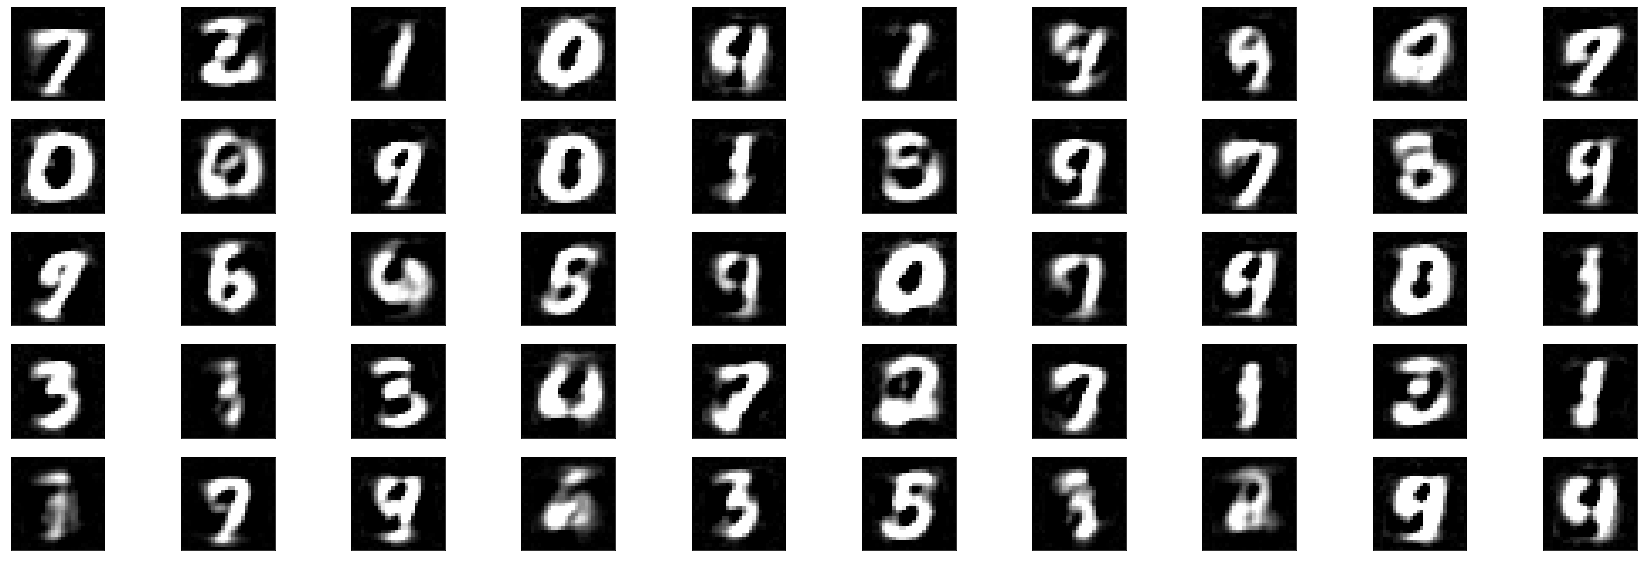

In [29]:
plot_imgs_grid(preds.reshape(-1,*imshape))

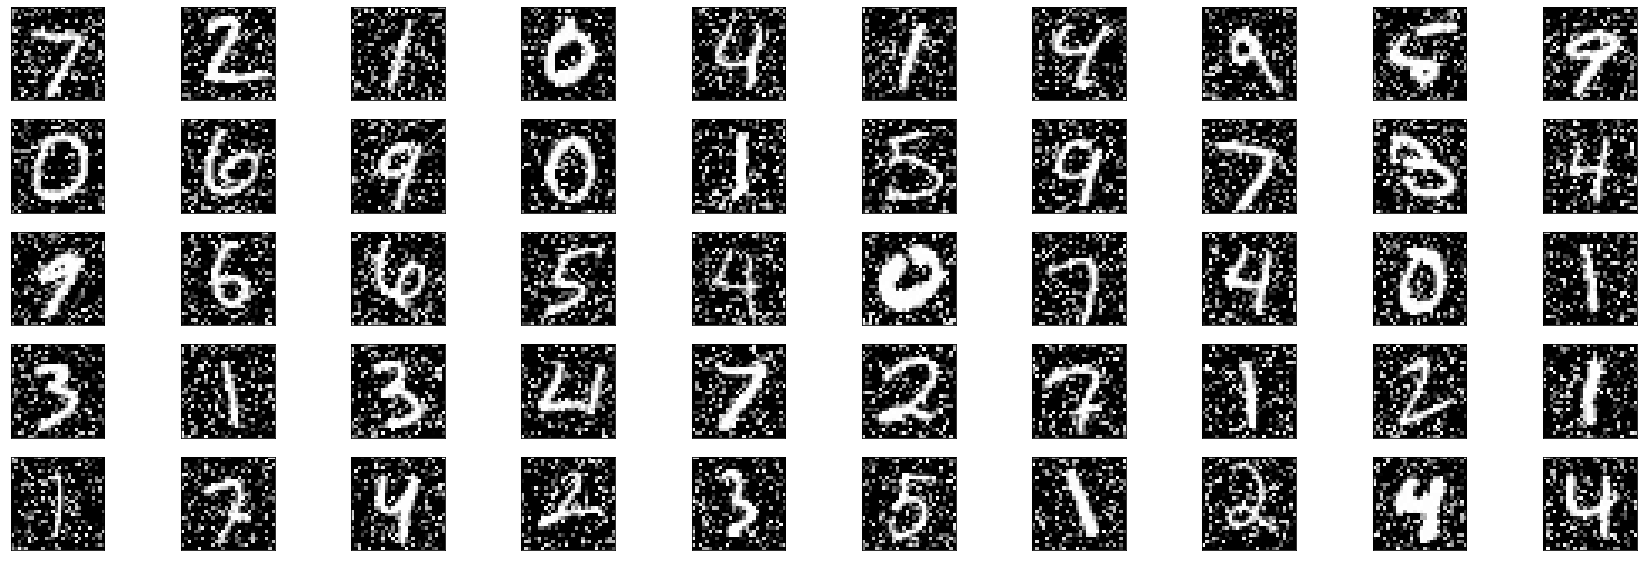

In [30]:
plot_imgs_grid(noisy_x_test.reshape(-1,*imshape))